<a href="https://colab.research.google.com/github/Aartizikre150/DAB-303/blob/main/DAB303_Group_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn
!pip install category_encoders
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 94.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00


In [2]:
# import the libraries
import pandas as pd
import numpy as np

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/DAB303/Project1/E-Commerce Churn Data.csv')

In [4]:
# Get the dimension of the data
print(data.shape)

(5630, 20)


In [5]:
# Get the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
# Print the first 5 records of the dataset
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [7]:
# Data description
print(data.describe(include='all'))

          CustomerID        Churn       Tenure PreferredLoginDevice  \
count    5630.000000  5630.000000  5366.000000                 5630   
unique           NaN          NaN          NaN                    3   
top              NaN          NaN          NaN         Mobile Phone   
freq             NaN          NaN          NaN                 2765   
mean    52815.500000     0.168384    10.189899                  NaN   
std      1625.385339     0.374240     8.557241                  NaN   
min     50001.000000     0.000000     0.000000                  NaN   
25%     51408.250000     0.000000     2.000000                  NaN   
50%     52815.500000     0.000000     9.000000                  NaN   
75%     54222.750000     0.000000    16.000000                  NaN   
max     55630.000000     1.000000    61.000000                  NaN   

           CityTier  WarehouseToHome PreferredPaymentMode Gender  \
count   5630.000000      5379.000000                 5630   5630   
unique     

In [8]:
# Print count of NA value in columns.
null_counts = data.isnull().sum()
print(null_counts)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [9]:
# Replace "Mobile Phone" with "Phone" in the 'PreferredLoginDevice' column
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')

# Replace "Cash on Delivery" with "COD" in the 'PreferredPaymentMode' column
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('Cash on Delivery', 'COD')
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('Credit Card', 'CC')

# Replace "Mobile Phone" with "Phone" in the 'PreferedOrderCat' column
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile Phone', 'Phone')

In [10]:
# Categorical to numerica conversion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])

# Fit and transform the encoder on the DataFrame
data_encoded = encoder.fit_transform(data)
data_encoded.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,1,1,3.0,3,1,2,1,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,1,1,8.0,2,2,3.0,4,2,3,1,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,1,1,30.0,1,2,2.0,4,2,3,1,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,1,3,15.0,1,2,2.0,4,1,5,1,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,1,1,12.0,3,2,NaN,3,2,5,1,3,0,11.0,1.0,1.0,3.0,130


In [11]:
# Create an empty DataFrame to store missing values and corresponding rows
missing_data_encoded = pd.DataFrame(columns=data_encoded.columns)

# Specify the columns you want to check for missing values
columns_to_check = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Find rows with missing values in the specified columns
missing_rows = data_encoded[data_encoded[columns_to_check].isna().any(axis=1)]

# Append the missing rows to the missing_data_encoded DataFrame
missing_data_encoded = pd.concat([missing_data_encoded, missing_rows], ignore_index=True)

# Remove rows with missing values in the specified columns from data_encoded
data_encoded.dropna(subset=columns_to_check, inplace=True)

# Reset the index for both dataframes
data_encoded.reset_index(drop=True, inplace=True)
missing_data_encoded.reset_index(drop=True, inplace=True)

# Make the data types of missing_data_encoded match data_encoded
missing_data_encoded = missing_data_encoded.astype(data_encoded.dtypes)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Loop through each target variable
target_variables = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for target_variable in target_variables:
    # Step 1: Split data_encoded into features and target
    X = data_encoded.drop(columns=[target_variable])  # Features
    y = data_encoded[target_variable]  # Target variable

    # Step 2: Create an imputer to handle missing values for both features and target
    feature_imputer = SimpleImputer(strategy='mean')
    target_imputer = SimpleImputer(strategy='mean')

    # Fit the imputers on your feature matrix X and target variable y
    feature_imputer.fit(X)
    target_imputer.fit(y.values.reshape(-1, 1))  # Reshape y to be a 2D array

    # Transform X to replace missing values with the mean
    X_imputed = feature_imputer.transform(X)

    # Transform y to replace missing values with the mean
    y_imputed = target_imputer.transform(y.values.reshape(-1, 1))

    # Flatten y_imputed back to a 1D array
    y_imputed = y_imputed.flatten()

    # Step 3: Create and train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees as needed
    model.fit(X_imputed, y_imputed)

    # Step 4: Predict missing values in missing_data_encoded
    missing_data_features = missing_data_encoded.drop(columns=[target_variable])  # Features for missing data
    missing_data_encoded[target_variable] = model.predict(feature_imputer.transform(missing_data_features))

# Drop rows with NaN values
data_encoded.dropna(inplace=True)

# Concatenate the dataframes
data_encoded = pd.concat([data_encoded, missing_data_encoded]).sort_values(by='CustomerID').reset_index(drop=True)


In [13]:

data_encoded

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,1,3,6.00,1,1,3.00,3,1,2,1,9,1,11.00,1.00,1.00,5.00,160
1,50002,1,0.23,1,1,15.97,2,2,2.38,4,2,3,1,7,1,18.46,0.35,1.22,2.21,121
2,50003,1,0.17,1,1,15.67,1,2,2.40,4,2,3,1,6,1,18.58,0.38,1.51,2.42,120
3,50004,1,0.00,1,3,15.00,1,2,2.00,4,1,5,1,8,0,23.00,0.00,1.00,3.00,134
4,50005,1,0.45,1,1,14.51,3,2,2.37,3,2,5,1,3,0,18.26,0.37,1.60,4.19,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.00,2,1,30.00,3,2,3.00,2,1,1,3,6,0,18.00,1.00,2.00,4.00,151
5626,55627,0,16.04,1,1,19.54,3,2,3.19,5,5,5,3,6,0,17.81,1.50,2.81,4.05,225
5627,55628,0,1.00,1,1,11.00,1,2,3.00,2,1,4,3,3,1,21.00,1.00,2.00,4.00,186
5628,55629,0,23.00,2,3,9.00,3,2,4.00,5,1,4,3,4,0,15.00,2.00,2.00,9.00,179


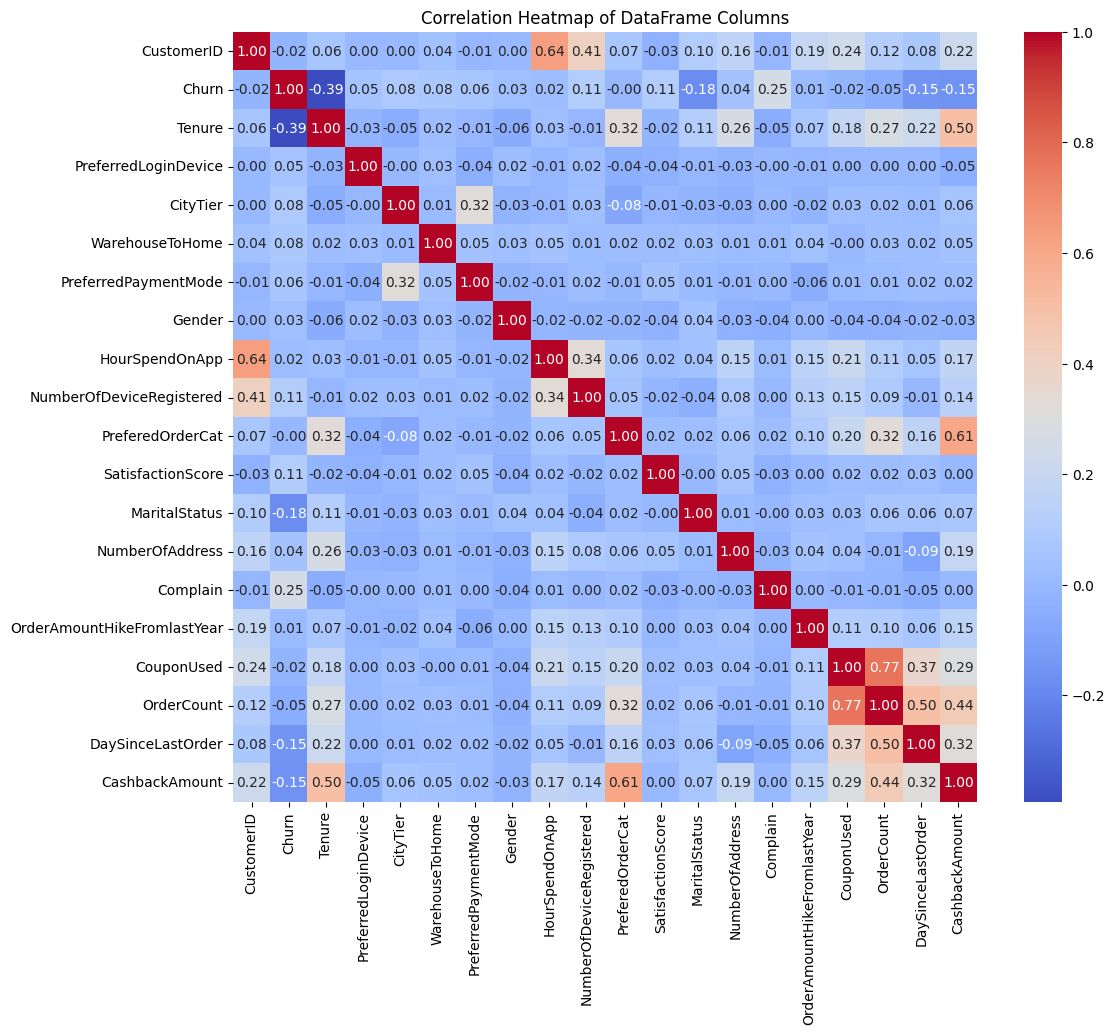

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# If your DataFrame contains non-numeric columns, you may need to encode or exclude them for the heatmap
# For this example, we'll include all columns

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()


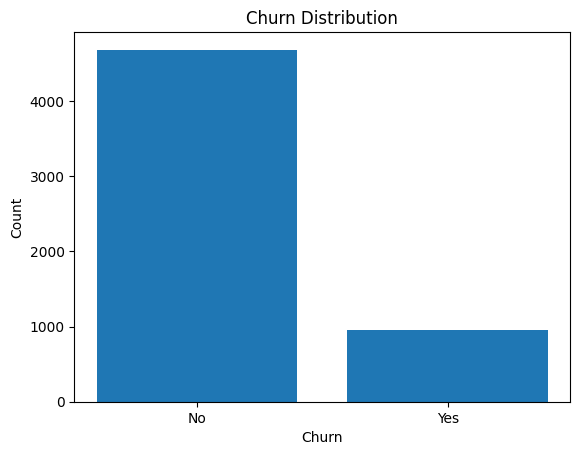

In [15]:
# The distribution of churn (Yes/No). This will help you understand the churn rate in your dataset.

# Count the number of customers in each churn category
churn_counts = data_encoded['Churn'].value_counts()

# Create a bar chart
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(churn_counts.index, ['No', 'Yes'])
plt.title('Churn Distribution')
plt.show()

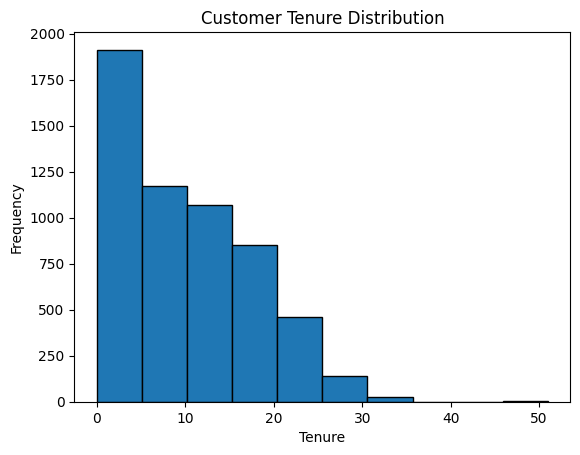

In [16]:
# The distribution of customer tenure. This can help you identify common tenure ranges.

# Create a histogram
plt.hist(data_encoded['Tenure'], bins=10, edgecolor='k')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Customer Tenure Distribution')
plt.show()

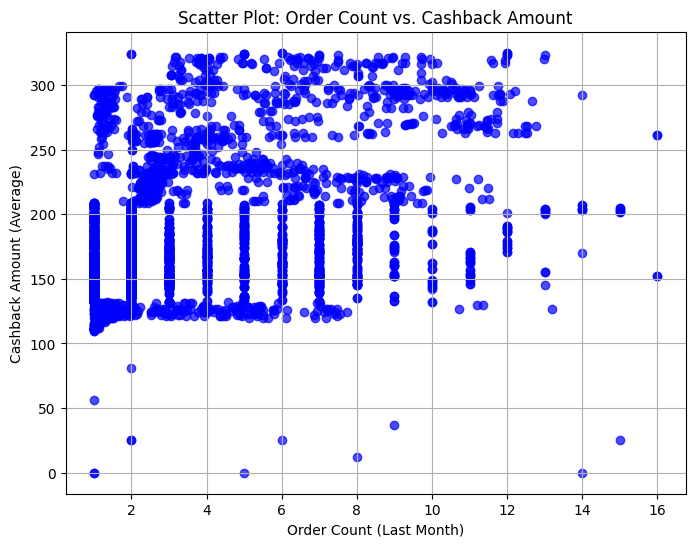

In [17]:
# Explore the relationship between the percentage increase in order amount from the last year and the total number of coupons used in the last month

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_encoded['OrderCount'], data_encoded['CashbackAmount'], c='blue', alpha=0.7)
plt.xlabel('Order Count (Last Month)')
plt.ylabel('Cashback Amount (Average)')
plt.title('Scatter Plot: Order Count vs. Cashback Amount')
plt.grid(True)
plt.show()

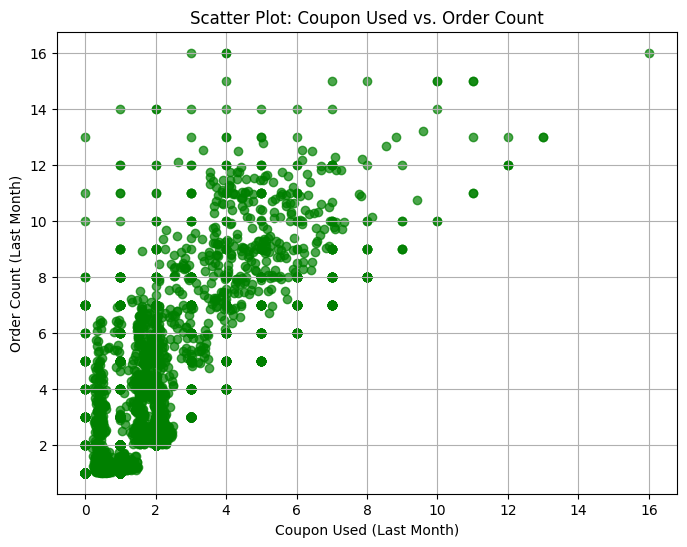

In [18]:
# Relationship between the total number of coupons used in the last month and the total number of orders placed in the last month for your customers.

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_encoded['CouponUsed'], data_encoded['OrderCount'], c='green', alpha=0.7)
plt.xlabel('Coupon Used (Last Month)')
plt.ylabel('Order Count (Last Month)')
plt.title('Scatter Plot: Coupon Used vs. Order Count')
plt.grid(True)
plt.show()

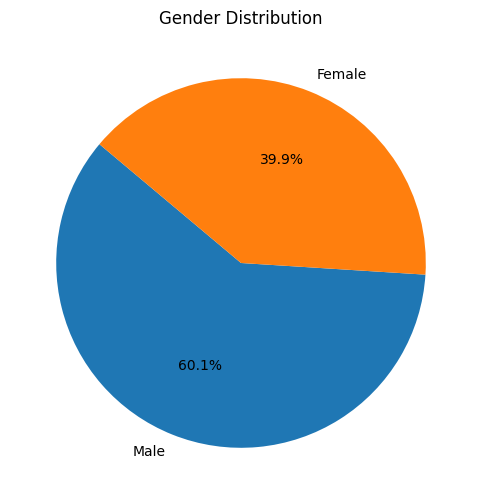

In [36]:
# Count the number of each gender
gender_counts = data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

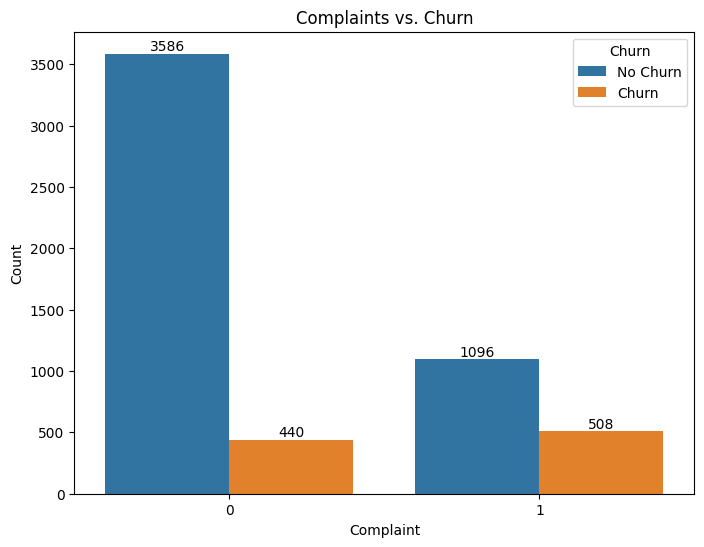

In [37]:
# Create a count plot to visualize the distribution of complaints among churned and non-churned customers
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data_encoded, x='Complain', hue='Churn')
plt.title('Complaints vs. Churn')
plt.xlabel('Complaint')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

# Adding annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

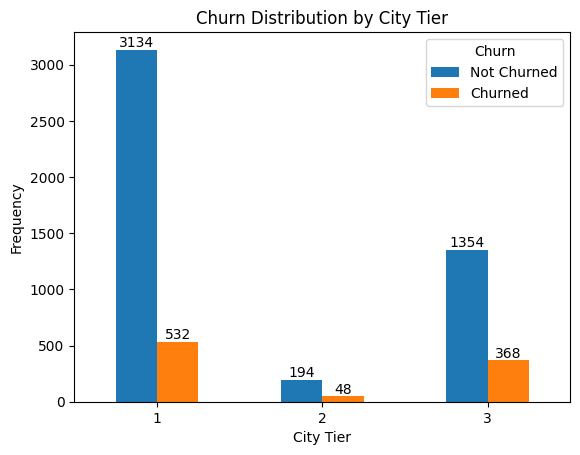

In [33]:
import matplotlib.pyplot as plt

# Group the data by CityTier and calculate the churn distribution
city_churn_distribution = data_encoded.groupby('CityTier')['Churn'].value_counts().unstack().fillna(0)

# Plot the bar chart
ax = city_churn_distribution.plot(kind='bar')
plt.xlabel('City Tier')
plt.ylabel('Frequency')
plt.title('Churn Distribution by City Tier')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Adding annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


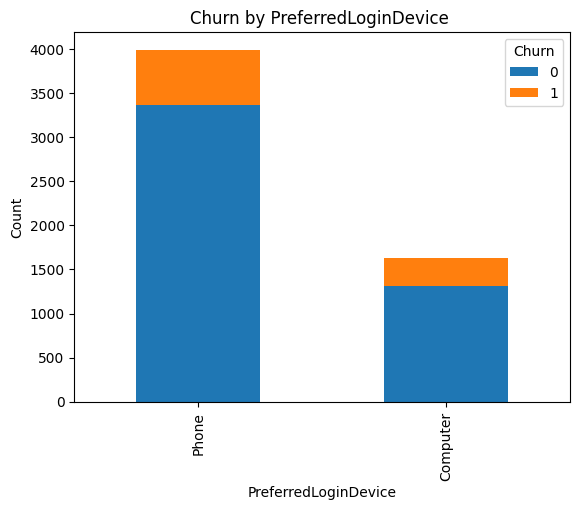

In [20]:
# Assuming you have already imported your data and encoded it as 'data_encoded'

# Group the data and create a stacked bar plot
grouped_data = data_encoded.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['Phone', 'Computer'])

# Show the plot
plt.show()


In [21]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data_encoded.drop(columns=["Churn"])
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Decision Tree Training Accuracy:", train_accuracy)
print("Decision Tree Testing Accuracy:", test_accuracy)


Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9493783303730018


In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data_encoded.drop(columns=["Churn"])
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Calculate and print the training score (mean accuracy)
training_score = logistic_regression_model.score(X_train, y_train)
print("Logistic Regression Training Score:", training_score)

# Calculate and print the testing score (mean accuracy)
testing_score = logistic_regression_model.score(X_test, y_test)
print("Logistic Regression Testing Score:", testing_score)


Logistic Regression Training Score: 0.8459147424511545
Logistic Regression Testing Score: 0.8383658969804618
